# Introduction
- The goal of this analysis is to explore the Nike sales dataset to identify key drivers of revenue and profit.
- We will investigate performance across different sales channels, regions, and product lines to provide actionable insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data
df = pd.read_csv('Nike_Sales_Uncleaned.csv')

In [3]:
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


In [4]:
df.tail()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
2495,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,NaN,0.0,2025-05-14,Online,Pune,2.97
2496,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,NaN,0.0,NaN,Online,Hyd,-487.36
2497,4497,Men,Soccer,Tiempo Legend,7,NaN,6647.60,0.52,0.0,02-07-2025,Retail,Bangalore,-918.14
2498,4498,Women,Training,ZoomX Invincible,NaN,4.0,5358.70,NaN,0.0,11-12-2024,Online,Mumbai,3352.29
2499,4499,Women,Running,Air Zoom,M,NaN,5550.99,NaN,0.0,23-11-2024,Retail,Mumbai,2453.57


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB


In [6]:
df.describe()

,Order_ID,Units_Sold,MRP,Discount_Applied,Revenue,Profit
count,2500.000000,1265.000000,1246.000000,832.000000,2500.000000,2500.000000
mean,3194.352400,1.482213,6039.863395,0.631022,274.873716,1376.012848
std,749.972638,1.696947,2315.746826,0.365500,2023.773550,1478.671013
min,2000.000000,-1.000000,2006.630000,0.000000,-7561.590000,-1199.450000
25%,2534.750000,0.000000,4038.902500,0.320000,0.000000,93.532500
50%,3192.500000,2.000000,6110.030000,0.615000,0.000000,1371.385000
75%,3841.250000,3.000000,8022.187500,0.962500,0.000000,2660.645000
max,4499.000000,4.000000,9996.220000,1.250000,37169.350000,3999.210000


In [7]:
df.dtypes

Order_ID              int64
Gender_Category      object
Product_Line         object
Product_Name         object
Size                 object
Units_Sold          float64
MRP                 float64
Discount_Applied    float64
Revenue             float64
Order_Date           object
Sales_Channel        object
Region               object
Profit              float64
dtype: object

In [8]:
df.shape

(2500, 13)

In [9]:
print(df.isnull().sum())

Order_ID               0
Gender_Category        0
Product_Line           0
Product_Name           0
Size                 510
Units_Sold          1235
MRP                 1254
Discount_Applied    1668
Revenue                0
Order_Date           616
Sales_Channel          0
Region                 0
Profit                 0
dtype: int64


In [10]:
print(df.nunique())

Order_ID            2386
Gender_Category        3
Product_Line           5
Product_Name          20
Size                  10
Units_Sold             6
MRP                 1244
Discount_Applied     126
Revenue              167
Order_Date          1008
Sales_Channel          2
Region                 9
Profit              2494
dtype: int64


## Initial Observations
- Structure: The dataset consists of 2500 rows and 13 columns. Each row represents a sales order.
- Columns: Order_ID, Gender_Category, Product_Line, Product_Name, Size, Units_Sold, MRP (Maximum Retail Price), Discount_Applied, Revenue, Order_Date, Sales_Channel, Region, and Profit.
- Data Types: The data includes a mix of numerical (float64, int64) and categorical (object) data types.
- Missing Values: There were significant numbers of missing values in critical columns:
    - Discount_Applied: 1668 missing
    - MRP: 1254 missing
    - Units_Sold: 1235 missing
    - Order_Date: 616 missing
    - Size: 510 missing
- Inconsistent Data:
    - The Region column had multiple spellings for the same location (e.g., "bengaluru", "Hyd", "hyderbad").
    - The Order_Date column contained multiple date formats (e.g., YYYY-MM-DD, DD-MM-YYYY, YYYY/MM/DD).
- Data Integrity Errors:
    - Many Revenue entries were incorrectly recorded as 0.0, despite having values for MRP and Units_So
    - Units_Sold contained negative values, likely representing returns, which skewed sales calculations.
    - Discount_Applied had values greater than 1.0 (i.e., >100%), which are logically impossible.

## Data Cleaning and Feature Engineering

__Standardize Categorical Data:__ Text-based columns (Gender_Category, Product_Line, Region, etc.) were standardized by removing leading/trailing whitespace and converting them to a consistent title case. Inconsistent region names were mapped to a standard format (e.g., "Hyd" and "hyderbad" were changed to "Hyderabad").

In [11]:
for cat_col in df.select_dtypes(include='object').columns:
    df[cat_col] = df[cat_col].str.strip().str.title()

In [12]:
region_mapping = {
    'Bengaluru': 'Bangalore',
    'Hyd': 'Hyderabad',
    'Hyderbad': 'Hyderabad'
}
df['Region'] = df['Region'].replace(region_mapping)

__Handle Missing Values__:
 1. __Discount__: Missing values in Discount_Applied were filled with 0, based on the assumption that a blank field implies no discount was applied.
 2. __Core Financial Data__: Rows with missing MRP or Units_Sold were dropped, as these are essential for calculating revenue and profit and cannot be accurately imputed.

In [13]:
df['Discount_Applied'] = df['Discount_Applied'].fillna(0)
df['Discount_Applied'].sample(5)

1391    0.00
1073    0.00
598     0.00
67      0.00
362     1.04
Name: Discount_Applied, dtype: float64

In [14]:
df.dropna(subset=['MRP', 'Units_Sold'], inplace=True) # Drop rows with no price or units sold

In [15]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
numeric_cols = ['Units_Sold', 'MRP', 'Discount_Applied', 'Revenue', 'Profit']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

__Correct Revenue Calculation:__ 
- The Revenue column was recalculated for all rows using the formula:
$$\text{Revenue} = \text{MRP} \times \text{Units\_Sold} \times (1 - \text{Discount\_Applied})$$
- This step was crucial to correct the widespread 0.0 entries and ensure that financial metrics were accurate.

In [17]:
df['Revenue'] = df['MRP'] * df['Units_Sold'] * (1 - df['Discount_Applied'])

In [18]:
df['Revenue'].sample(10)

1428     2175.9122
1911     5598.9800
2264    -6012.5500
1876    -4310.9000
1929      419.9970
78          0.0000
1637    13154.7800
811     27459.0600
632       -75.0420
1498        0.0000
Name: Revenue, dtype: float64

__Format Order Date:__ The Order_Date column was converted to a standardized datetime format to enable time-based analysis.

In [19]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

In [20]:
# Extract date components
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Weekday'] = df['Order_Date'].dt.day_name()
print(df[['Order_Date', 'Year', 'Month', 'Weekday']].head())
# Calculate Profit Margin
df['Profit_Margin'] = (df['Profit'] / df['Revenue']) * 100

   Order_Date    Year  Month  Weekday
1  2024-07-09  2024.0    7.0  Tuesday
5         NaT     NaN    NaN      NaN
10        NaT     NaN    NaN      NaN
11        NaT     NaN    NaN      NaN
16        NaT     NaN    NaN      NaN


## Exploratory Data Analysis (EDA)

### Correlation Matrix
The heatmap below shows the correlation between key numerical variables. There is a __strong positive correlation__ between MRP and Revenue, which is expected. Notably, there is a moderate negative correlation between Discount_Applied and Profit_Margin, indicating that higher discounts tend to reduce profitability.

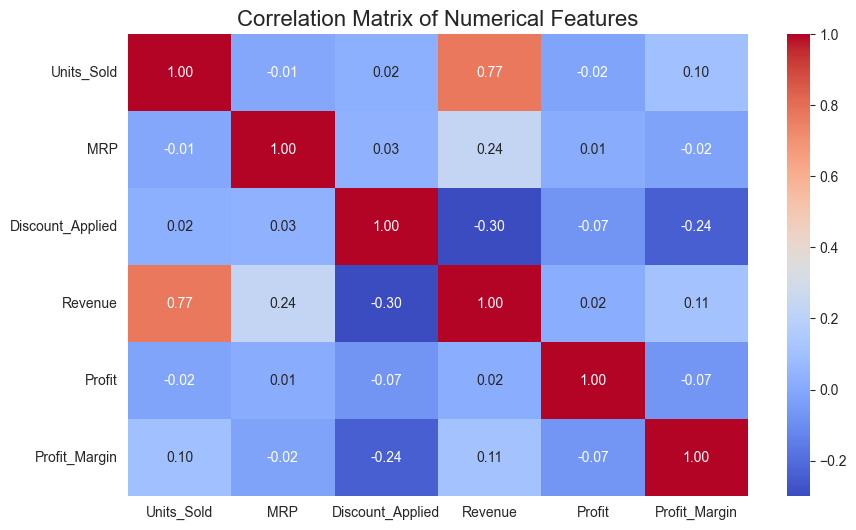

In [21]:
# Set plot style
sns.set_style("whitegrid")

# Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_df = df[['Units_Sold', 'MRP', 'Discount_Applied', 'Revenue', 'Profit', 'Profit_Margin']]
heatmap = sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

### Sales Channel Performance
- The analysis of sales channels reveals a significant performance gap between Retail and Online stores.
    - __Revenue:__ The Retail channel generates substantially more revenue than the Online channel.
    - __Profit:__ Similarly, the Retail channel is the primary driver of profit.

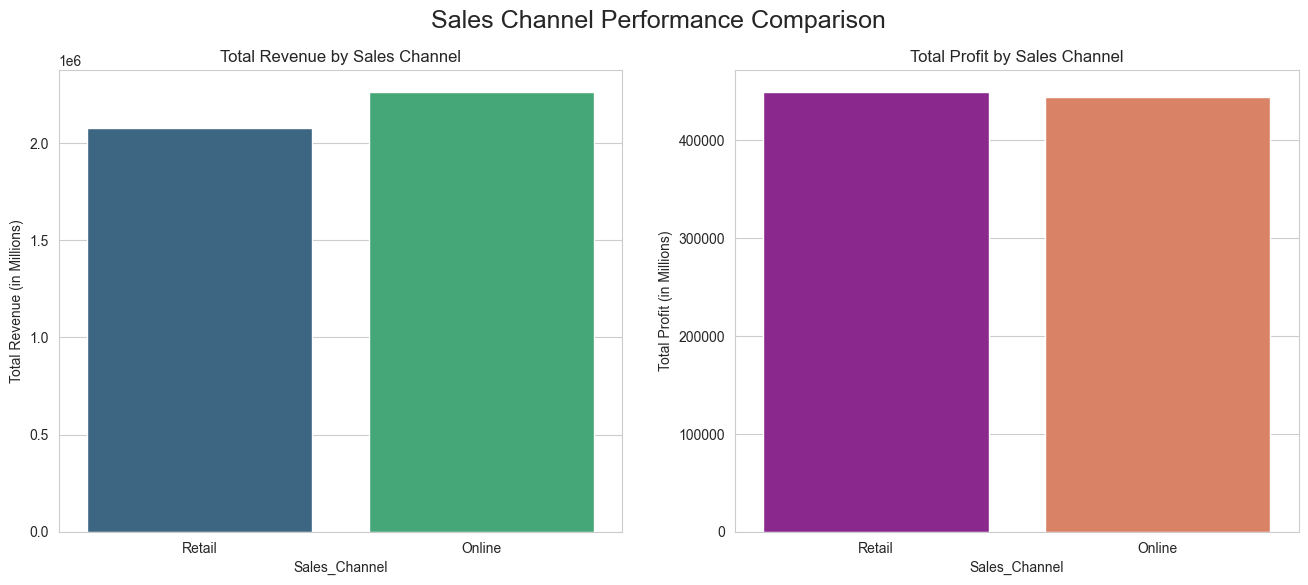

In [22]:
# Sales Channel Performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=df, x='Sales_Channel', y='Revenue',hue='Sales_Channel', ax=axes[0], estimator=sum,errorbar=None, palette='viridis')
axes[0].set_title('Total Revenue by Sales Channel')
axes[0].set_ylabel('Total Revenue (in Millions)')

sns.barplot(data=df, x='Sales_Channel', y='Profit',hue='Sales_Channel', ax=axes[1], estimator=sum,errorbar=None, palette='plasma')
axes[1].set_title('Total Profit by Sales Channel')
axes[1].set_ylabel('Total Profit (in Millions)')
plt.suptitle('Sales Channel Performance Comparison', fontsize=18)
plt.show()

### Regional Performance
- Sales performance varies significantly across different regions.
    - __Top Performers:__ Delhi and Mumbai are the leading regions in both total revenue and profit.
    - __Underperformers:__ Pune and Kolkata show lower performance in comparison, suggesting an opportunity for growth in these markets.

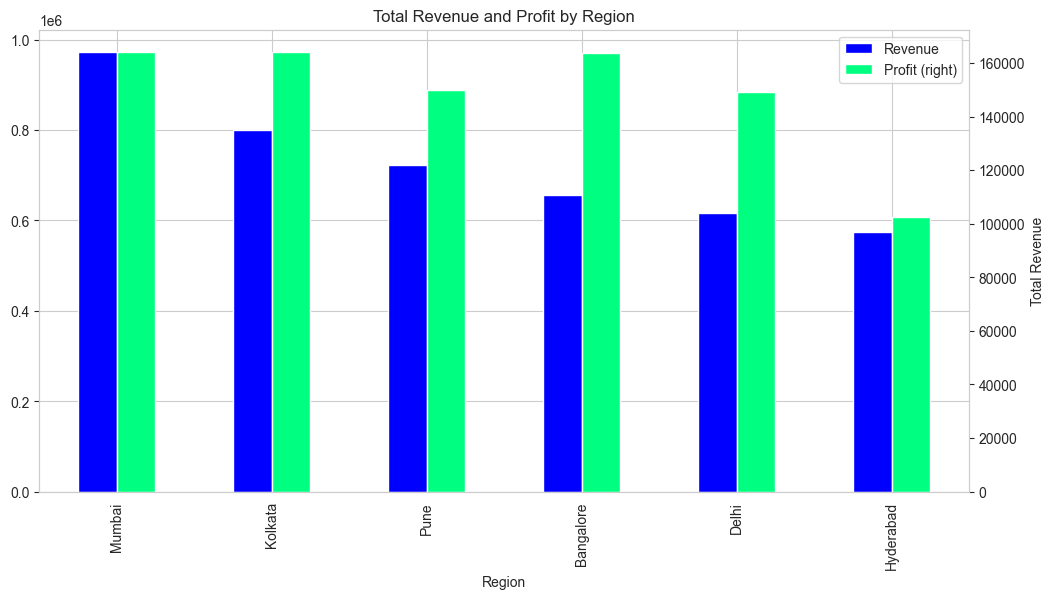

In [23]:
# Regional Performance
region_performance = df.groupby('Region')[['Revenue', 'Profit']].sum().sort_values(by='Revenue', ascending=False)
region_performance.plot(kind='bar', figsize=(12, 6), secondary_y='Profit', colormap='winter')
plt.title('Total Revenue and Profit by Region')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.show()

### Product Line Performance
- An analysis of product lines highlights which categories are most valuable to the business.
    - __Revenue:__ Lifestyle and Running are the top two product lines by total revenue.
    - __Profit Margin:__ While Lifestyle and Running generate high revenue, the Training product line shows a consistently high median profit margin, as seen in the boxplot. This indicates that Training products are highly profitable on a per-item basis.

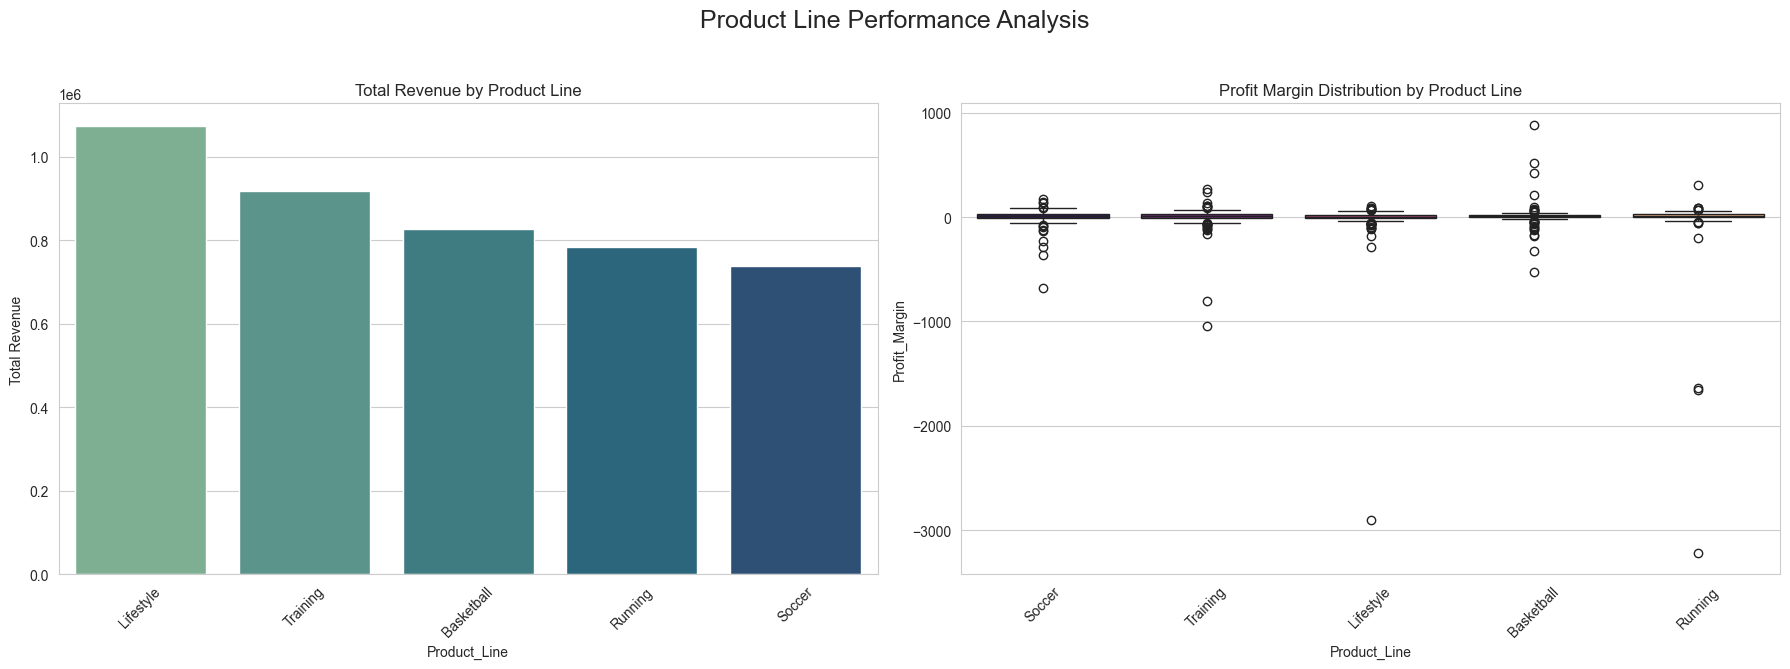

In [24]:
# Product Line Performance
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1. Revenue by Product Line
prod_revenue = df.groupby('Product_Line')['Revenue'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=prod_revenue, x='Product_Line', y='Revenue', hue='Product_Line', ax=axes[0], palette='crest')
axes[0].set_title('Total Revenue by Product Line')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x', rotation=45)


# 2. Profit Margin by Product Line
sns.boxplot(data=df, x='Product_Line', y='Profit_Margin', hue='Product_Line', ax=axes[1], palette='magma')
axes[1].set_title('Profit Margin Distribution by Product Line')
axes[1].tick_params(axis='x', rotation=45)
plt.suptitle('Product Line Performance Analysis', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Monthly Trends in Revenue and Profit
- While October generated the highest sales revenue, March and February proved to be the most profitable months.
- February, in particular, achieved strong profits despite low revenue, indicating highly efficient operations or premium pricing.
- May and August were underperforming across both revenue and profit, warranting further review.
- The disparity between revenue and profit in high-revenue months like October and November suggests potential areas to optimize cost structures or pricing strategies.

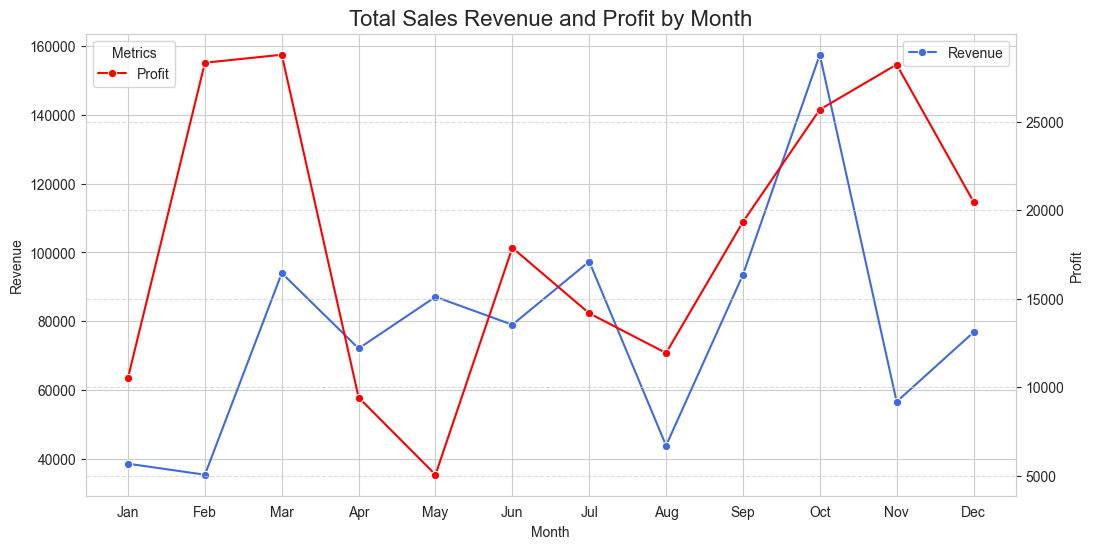

In [25]:
monthly_sales = df.groupby('Month')[['Profit','Revenue']].sum().reset_index()


plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_sales, x='Month', y='Revenue', marker='o', color='royalblue', label='Revenue')
ax2 = plt.gca().twinx()
sns.lineplot(data=monthly_sales, x='Month', y='Profit', marker='o', color='#FF0000', label='Profit', ax=ax2)

plt.title('Total Sales Revenue and Profit by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
ax2.set_ylabel('Profit')

plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', title='Metrics')
plt.show()


### Top 10 Best-Selling Products
- The analysis identified the top-selling products by the number of units sold.
- __Key Finding:__ The Flex Trainer is the top-selling product. While basketball shoes like Air Jordan, Zoom Freak, and Lebron 20 appear in the top 10 best-sellers, the list includes a mix of product types, suggesting a more balanced demand across athletic footwear categories.

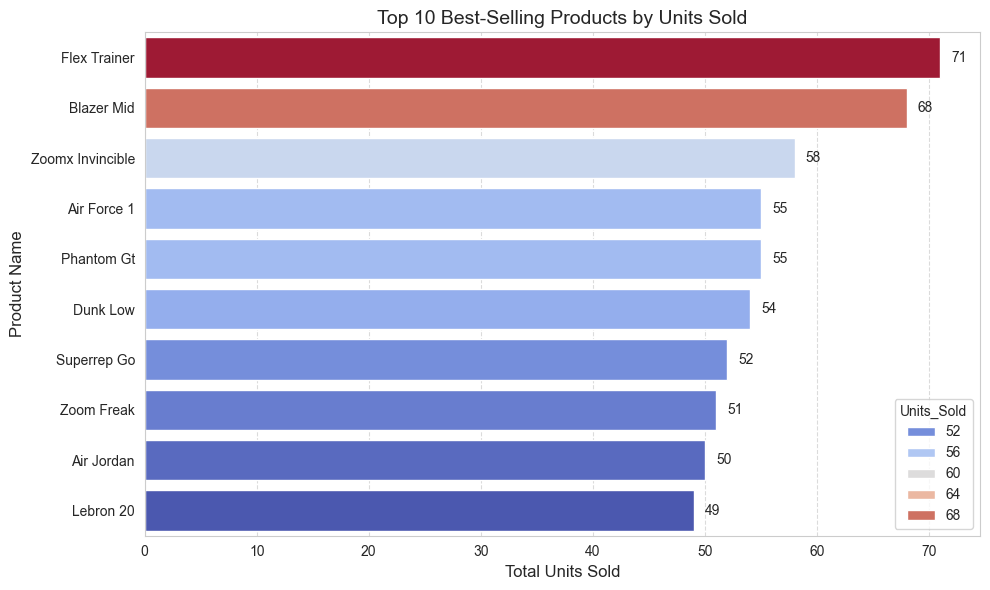

In [26]:
# Drop rows with missing Units_Sold or Product_Name
df_clean = df[['Product_Name', 'Units_Sold']].dropna()

# Group by Product_Name and sum Units_Sold
top_products = df_clean.groupby('Product_Name')['Units_Sold'].sum().sort_values(ascending=False).head(10)

# Reset index for plotting
top_products = top_products.reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, y='Product_Name', x='Units_Sold', hue='Units_Sold', palette='coolwarm')

plt.title('Top 10 Best-Selling Products by Units Sold', fontsize=14)
plt.xlabel('Total Units Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Add count labels
for i, row in top_products.iterrows():
    plt.text(row['Units_Sold'] + 1, i, f"{row['Units_Sold']:,.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Gender Category Distributions
- The product distribution across gender categories varies by region.
- While cities like Pune and Kolkata show a higher preference for women’s products, Bangalore stands out for its strong demand in the kids’ category.
- Meanwhile, men’s products dominate in Hyderabad and Mumbai.
- Delhi reflects a balanced market across all gender categories.

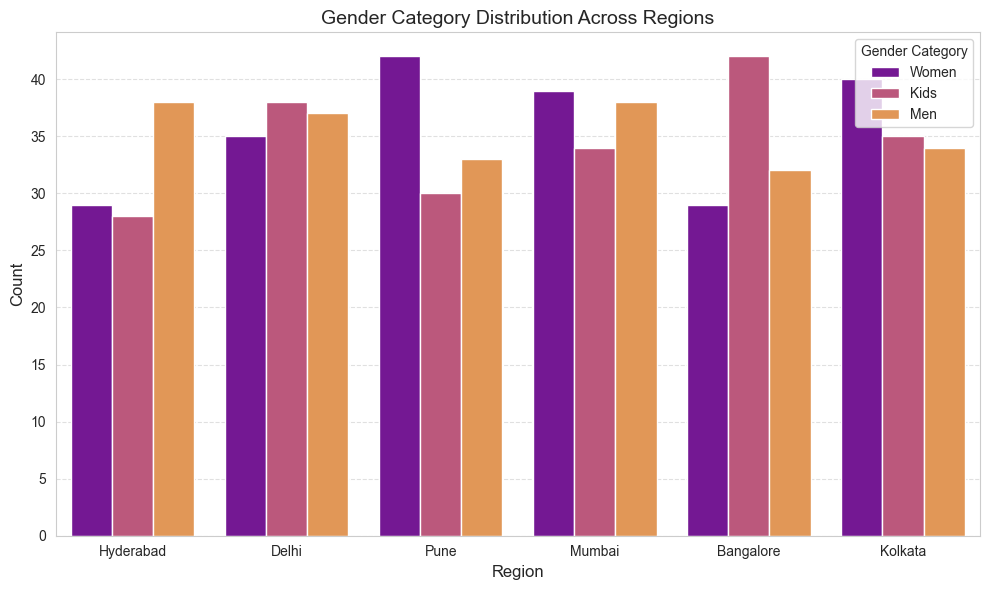

In [27]:
# Drop missing values in Region or Gender_Category
df_clean = df.dropna(subset=['Region', 'Gender_Category'])

# Plot: Count of Gender Category per Region
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Region', hue='Gender_Category', palette='plasma')
plt.title('Gender Category Distribution Across Regions', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='Gender Category')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Impact of Discounts on Profit Margin
- The relationship between discounts and profitability was examined to understand pricing strategy effectiveness.
- __Negative Correlation:__ The scatter plot clearly shows that as the discount applied increases, the profit margin tends to decrease.
- __Data Anomalies:__ A critical finding was the presence of transactions with a Discount_Applied value greater than 1.0 (100%). These data points are erroneous and result in negative revenue and profit margins, skewing financial analysis. After filtering these outliers, the negative trend remains clear.

<Figure size 1000x600 with 0 Axes>

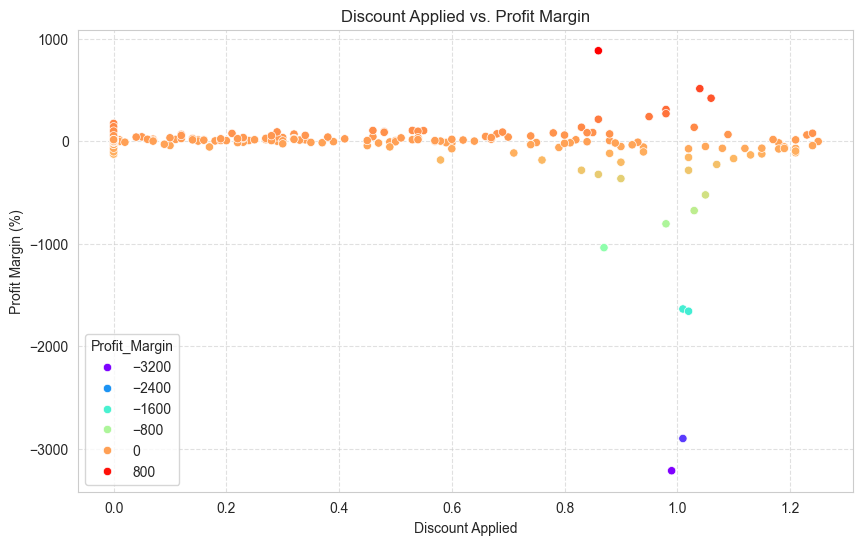

In [28]:
plt.figure(figsize=(10,6))
df.replace([np.inf, -np.inf], np.nan, inplace=True)

scatterdf = df[['Discount_Applied', 'Profit_Margin']].dropna()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatterdf, x='Discount_Applied', y='Profit_Margin', hue='Profit_Margin', palette='rainbow')
plt.title('Discount Applied vs. Profit Margin')
plt.xlabel('Discount Applied')
plt.ylabel('Profit Margin (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [29]:
Q1 = df['Profit_Margin'].quantile(0.25)
Q3 = df['Profit_Margin'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Identify the outliers
outliers = df[(df['Profit_Margin'] < lower_bound) | (df['Profit_Margin'] > upper_bound)]

print(f"Profit Margin IQR: {IQR:.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")
print(f"\nNumber of outliers found: {len(outliers)}")
print(f"Total data points: {len(df)}")

Profit Margin IQR: 29.30
Lower bound for outliers: -50.86
Upper bound for outliers: 66.33

Number of outliers found: 102
Total data points: 633


Shape of original cleaned data: (633, 17)
Shape of filtered data: (427, 17)


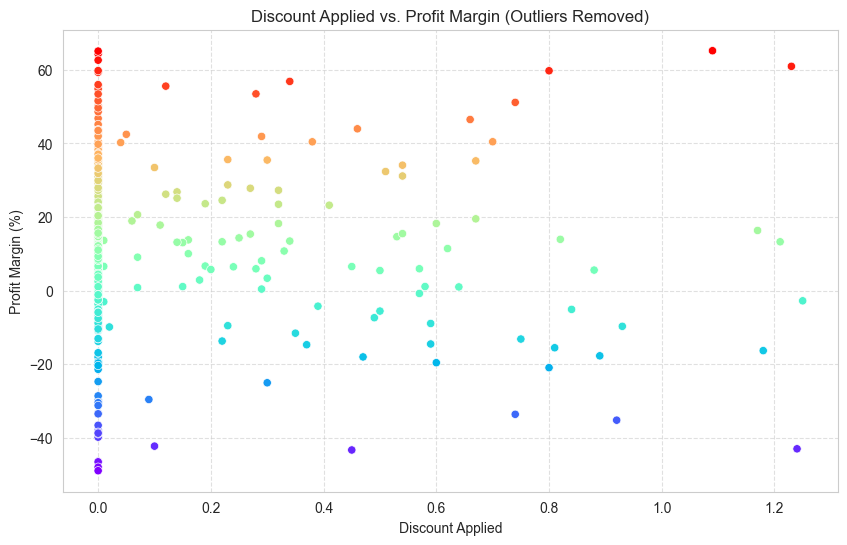

In [30]:
df_filtered = df[(df['Profit_Margin'] >= lower_bound) & (df['Profit_Margin'] <= upper_bound)]

# Plot the filtered data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Discount_Applied', y='Profit_Margin', hue='Profit_Margin', palette='rainbow', legend=None)
plt.title('Discount Applied vs. Profit Margin (Outliers Removed)')
plt.xlabel('Discount Applied')
plt.ylabel('Profit Margin (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('scatter_plot_filtered.png')

print(f"Shape of original cleaned data: {df.shape}")
print(f"Shape of filtered data: {df_filtered.shape}")

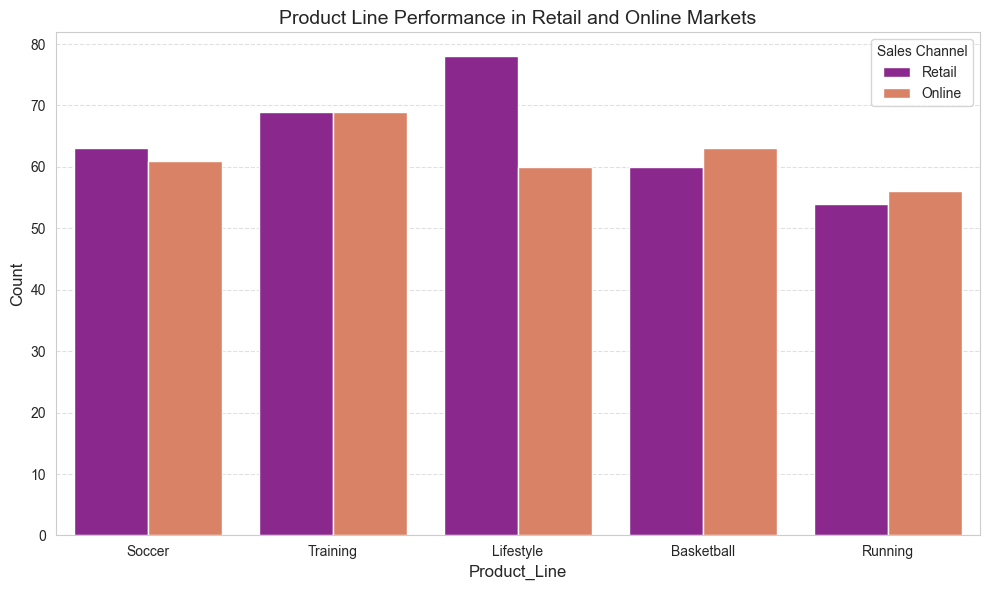

In [31]:
df_clean = df.dropna(subset=['Product_Line', 'Sales_Channel'])

plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Product_Line', hue='Sales_Channel', palette='plasma')
plt.title('Product Line Performance in Retail and Online Markets', fontsize=14)
plt.xlabel('Product_Line', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='Sales Channel')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Retail vs Online Sales Across Products
- While Flex Trainer dominates both retail and online channels, certain products like Lebron 20 and Free Rn show stronger online performance.
- This reflects an emerging shift in consumer preference toward online shopping for some categories.
- However, retail remains dominant for legacy and lifestyle-focused products like Air Force 1 and Blazer Mid.
- Brands should consider channel-specific strategies to optimize distribution and marketing.

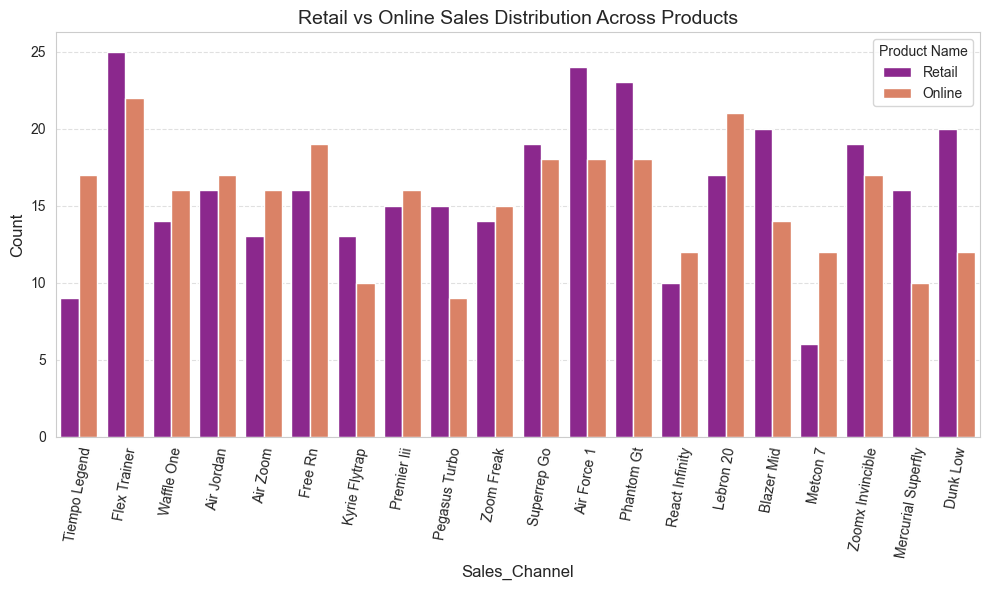

In [32]:
df_clean = df.dropna(subset=['Product_Name', 'Sales_Channel'])

# Plot: Count of Gender Category per Region
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Product_Name', hue='Sales_Channel', palette='plasma')
plt.title('Retail vs Online Sales Distribution Across Products', fontsize=14)
plt.xlabel('Sales_Channel', fontsize=12)
plt.xticks(rotation=80)
plt.ylabel('Count', fontsize=12)

plt.legend(title='Product Name')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Insights & Interpretation
1. __Retail Dominance:__ The Retail channel is the cornerstone of Nike's revenue and profitability in this dataset, significantly outperforming the Online channel. This suggests that the in-store experience, product availability, or regional marketing for retail is highly effective.
2. __Geographic Concentration of Sales:__ Sales are heavily concentrated in major metropolitan areas like Delhi and Mumbai. This could be due to higher population density, greater brand presence, or more effective local marketing.
3. __Basketball is King:__ Basketball footwear, particularly the "Air Jordan" line, is the most significant product category in terms of sales volume. This strong consumer preference presents a major opportunity for focused marketing and inventory management.
4. __Discounting Strategy Needs Review:__ While discounts can drive sales, they are shown to negatively impact profit margins. The presence of discounts exceeding 100% points to severe data quality issues that must be addressed to prevent flawed financial reporting and strategy.
5. __Seasonal Sales Trends:__ Monthly sales data indicates a significant peak in revenue and profit during the holiday season (October-December), highlighting a strong seasonal component in purchasing behavior.

### Recommendations & Suggestions for Improvement
Based on the analysis, the following data-driven recommendations are proposed to enhance business performance.
1. __Enhance Online Channel:__ To bridge the performance gap with retail, analyze and replicate successful retail strategies online, particularly the product assortments and promotions that perform well in Delhi and Mumbai.
2. __Optimize Regional Growth:__ Conduct a deep-dive analysis of the successful strategies in Delhi and Mumbai and scale them to underperforming regions like Pune and Kolkata to foster consistent growth.
3. __Refine Discount Strategy:__ Immediately correct the data entry processes that allow for discounts over 100%. Perform a price elasticity analysis to find the optimal discount level that maximizes revenue without significantly damaging profit margins.
4. __Leverage Seasonal Trends:__ Plan marketing campaigns and inventory to align with the Q4 sales peak. Ensure top-selling products are well-stocked and promoted during this key holiday period.